Ensemble
Theoretical


In [ ]:
# Q1.Can we use Bagging for regression problems?
Ans:-Yes, Bagging can be used for regression problems. Bagging, which stands for Bootstrap Aggregating, is an ensemble technique that involves training multiple models on different bootstrap samples of the training data and then combining their predictions.

For regression, the individual models (often decision trees or other regressors) trained on the bootstrap samples make their predictions. The final prediction of the Bagging ensemble is typically the average (or median) of the predictions from the individual models. This averaging helps to reduce variance and improve the overall performance of the model, similar to how Bagging reduces variance in classification problems.

Common regression algorithms that are often used with Bagging include Decision Trees (leading to Bagged Decision Trees or Random Forests, which is a variant that also incorporates feature randomness) and other regressor types.

# Q2.What is the difference between multiple model training and single model training?
Ans:-# Single Model Training

**Single model training** involves training a single machine learning model on the entire available dataset. The goal is to find the optimal parameters for that specific model that best fit the data and generalize well to unseen data.

**Characteristics of Single Model Training:**

*   **Simplicity:** It's generally simpler to implement and understand.
*   **Computational Cost:** Lower computational requirements compared to training multiple models.
*   **Potential for Overfitting:** A single model might be prone to overfitting, especially if the dataset is complex or noisy, or if the model is too complex.
*   **Bias-Variance Trade-off:** A single model might struggle to balance the bias-variance trade-off effectively.
*   **Less Robust:** Performance can be highly dependent on the specific algorithm chosen and its hyperparameter tuning.

## Multiple Model Training (Ensemble Methods)

**Multiple model training**, often referred to as **ensemble methods**, involves training multiple individual models (called base learners or weak learners) and combining their predictions to make a final prediction. The idea is that by combining the predictions of several models, the ensemble can achieve better performance and robustness than any single model alone.

**Characteristics of Multiple Model Training:**

*   **Improved Accuracy:** Ensemble methods often achieve higher accuracy than single models, especially on complex datasets.
*   **Reduced Variance:** Techniques like Bagging and Random Forests help reduce variance by averaging or combining predictions from models trained on different subsets of data.
*   **Increased Robustness:** Ensembles are less sensitive to noise and outliers in the data.
*   **Can Reduce Overfitting:** By combining diverse models, the ensemble can generalize better to unseen data.
*   **Computational Cost:** Higher computational requirements due to training multiple models.
*   **Complexity:** More complex to implement and understand compared to single model training.

# Q3.Explain the concept of feature randomness in Random Forest?
Ans:-## Feature Randomness in Random Forest

**Feature randomness** (also known as **feature subsampling** or **random subspace method**) is a crucial technique used in Random Forests, in addition to bootstrap aggregating (bagging). While bagging introduces randomness by sampling the training data with replacement to create multiple training sets, feature randomness introduces another layer of randomness during the construction of each individual decision tree within the forest.

Here's how it works:

1.  **For each individual decision tree in the Random Forest:** Instead of considering all the features available in the dataset at each split node, the decision tree is only allowed to consider a random subset of the features.
2.  **At each split node:** Before finding the best feature to split on, a random subset of the available features is selected. The size of this subset is a hyperparameter, often denoted as `max_features` or `mtry`. Common values for `max_features` are the square root of the total number of features for classification problems and one-third of the total number of features for regression problems.
3.  **Finding the best split:** The decision tree then finds the best split point only among the features within that random subset.

**Why is feature randomness important?**

*   **Reduces Correlation between Trees:** Without feature randomness, if there's a very strong predictor feature, all the trees in the forest would likely choose that feature as the root node or very early in their structure. This would make the individual trees highly correlated, and the benefits of averaging their predictions would be limited. Feature randomness forces the trees to explore other features, reducing their correlation and making the ensemble more robust.
*   **Increases Diversity:** By restricting the features available at each split, feature randomness encourages the growth of more diverse trees. Each tree focuses on slightly different aspects of the data, leading to a more comprehensive model when their predictions are combined.
*   **Reduces Variance:** Similar to bagging, the diversity introduced by feature randomness helps to further reduce the variance of the overall Random Forest model.
*   **Handles High-Dimensional Data:** Feature randomness can be particularly beneficial in datasets with a large number of features, as it makes the tree induction process faster and helps to prevent overfitting by focusing on subsets of features.

# Q4.What is OOB (Out-of-Bag) Score?
Ans:-## Out-of-Bag (OOB) Score

The **Out-of-Bag (OOB) score** is a method for estimating the generalization performance of a Bagging ensemble (like Random Forests) without the need for a separate validation set or cross-validation. It leverages the fact that in Bagging, each individual model is trained on a bootstrap sample of the training data, meaning some training instances are left out of the training set for each specific model. These left-out instances are called "out-of-bag" instances for that particular model.

Here's how the OOB score is calculated:

1.  **For each training instance:** Consider a specific training instance. This instance was likely *not* included in the bootstrap sample used to train some of the individual models in the ensemble.
2.  **Make predictions with OOB models:** For that specific training instance, gather the predictions from *all* the individual models in the ensemble for which this instance was an "out-of-bag" sample.
3.  **Combine OOB predictions:** Combine the predictions from these OOB models for that instance. For classification, this is typically done by taking a majority vote. For regression, it's usually the average of the predictions.
4.  **Compare with the true label:** Compare this combined OOB prediction for the instance with its actual true label.
5.  **Aggregate performance:** Repeat this process for all training instances. The OOB score is then the overall performance metric (e.g., accuracy for classification, mean squared error for regression) calculated based on these OOB predictions across all training instances.

**Why is the OOB score useful?**

*   **Internal Validation:** It provides an internal validation mechanism within the Bagging process itself.
*   **Avoids Separate Validation Set:** You don't need to split your training data into a separate validation set, which means you can use all your data for training the individual models. This can be particularly beneficial with smaller datasets.
*   **Computational Efficiency:** Calculating the OOB score is computationally efficient as it reuses computations already performed during the training of the individual models.
*   **Good Estimator of Generalization Error:** The OOB score has been shown to be a good estimator of the model's generalization error on unseen data.

# Q5.How can you measure the importance of features in a Random Forest model?
Ans:-In a Random Forest model, there are two primary ways to measure the importance of features:

1.  **Mean Decrease in Impurity (MDI) or Gini Importance:**
    *   This is the most commonly used measure and is based on how much each feature contributes to reducing the impurity (like Gini impurity for classification or mean squared error for regression) across all trees in the forest.
    *   When a decision tree is built, it finds the best split at each node based on a feature. The reduction in impurity achieved by splitting on a particular feature is recorded.
    *   For a Random Forest, the importance of a feature is calculated by averaging the total reduction in impurity it achieves across all the trees in the forest, weighted by the proportion of samples reaching that node.
    *   Features that result in larger reductions in impurity are considered more important.
    *   This measure is readily available in most Random Forest implementations (e.g., in scikit-learn).

2.  **Mean Decrease Accuracy (MDA) or Permutation Importance:**
    *   This method is generally considered more reliable, especially when features are correlated or when dealing with datasets with varying scales.
    *   It works by shuffling the values of a single feature in the out-of-bag (OOB) samples and observing how much the model's performance (e.g., accuracy, R-squared) decreases.
    *   The idea is that if a feature is important, permuting its values will disrupt the model's ability to make accurate predictions, leading to a significant drop in performance.
    *   The larger the decrease in performance after shuffling a feature, the more important that feature is considered to be.
    *   This method is more computationally expensive than MDI but can provide a more robust measure of importance. It's available in scikit-learn through the `permutation_importance` function.

**In summary:**

*   **MDI/Gini Importance:** Based on impurity reduction during tree building. Faster but can be biased towards features with many categories or continuous features.
*   **MDA/Permutation Importance:** Based on the impact on model performance when a feature's values are shuffled. More computationally intensive but often more reliable, especially with correlated features.

Most implementations provide MDI as the default feature importance. It's often a good starting point, but for a more thorough analysis, especially when dealing with complex datasets, Permutation Importance is recommended.

# Q6.Explain the working principle of a Bagging Classifier?
Ans:-## Working Principle of a Bagging Classifier

A Bagging Classifier is an **ensemble learning technique** that aims to improve the stability and accuracy of machine learning algorithms, primarily for classification problems. The core idea behind Bagging (Bootstrap Aggregating) is to **reduce variance** by training multiple instances of the same base classifier on different random subsets of the training data and then combining their predictions.

Here's a breakdown of the working principle:

1.  **Bootstrap Sampling:**
    *   Bagging starts by creating multiple (say, *k*) new training datasets from the original training dataset.
    *   Each new dataset is created by **sampling with replacement** from the original training data. This means that some instances from the original dataset may appear multiple times in a bootstrap sample, while others may not appear at all (these are the out-of-bag instances discussed earlier).
    *   Each bootstrap sample is typically the same size as the original training dataset.

2.  **Training Base Classifiers:**
    *   An independent instance of the chosen base classifier (e.g., Decision Tree, Support Vector Machine, etc.) is trained on each of the *k* bootstrap samples created in the previous step.
    *   Crucially, each base classifier is trained **independently** of the others. They do not communicate or influence each other's training process.

3.  **Aggregating Predictions:**
    *   Once all *k* base classifiers are trained, they are used to make predictions on new, unseen data.
    *   For a new instance, each base classifier makes its own individual prediction.
    *   The final prediction of the Bagging ensemble is determined by combining the predictions of all base classifiers. For classification, this is typically done using a **majority vote**: the class that receives the most votes from the individual classifiers is the final predicted class. In case of a tie, a tie-breaking rule is used.

**Why does Bagging work?**

The power of Bagging comes from the fact that the individual base classifiers are trained on different subsets of the data. This introduces **diversity** among the classifiers.

*   **Reduces Variance:** By averaging (or taking a majority vote of) the predictions from multiple diverse models, Bagging effectively reduces the variance of the overall model. Individual models trained on slightly different data subsets might have different errors or biases. Averaging these predictions tends to cancel out some of the individual errors, leading to a more stable and less sensitive model to small fluctuations in the training data.
*   **Improves Robustness:** Bagging makes the overall model more robust to noise and outliers in the training data. Outliers in one bootstrap sample might have a significant impact on the model trained on that sample, but their effect is diluted when combined with predictions from models trained on other samples where those outliers are not present or have less influence.

# Q7.How do you evaluate a Bagging Classifier’s performance?
Ans:-
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming model is your trained BaggingClassifier and X_test, y_test are your test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Q8.How does a Bagging Regressor work?
Ans:-## Working Principle of a Bagging Regressor

A Bagging Regressor, similar to a Bagging Classifier, is an **ensemble learning technique** designed to improve the stability and accuracy of regression models by **reducing variance**. It achieves this by training multiple instances of the same base regressor on different random subsets of the training data and then combining their predictions.

Here's a breakdown of the working principle, which is very similar to the Bagging Classifier with a key difference in how predictions are combined:

1.  **Bootstrap Sampling:**
    *   Bagging starts by creating multiple (say, *k*) new training datasets from the original training dataset.
    *   Each new dataset is created by **sampling with replacement** from the original training data. This means that some instances from the original dataset may appear multiple times in a bootstrap sample, while others may not appear at all (these are the out-of-bag instances).
    *   Each bootstrap sample is typically the same size as the original training dataset.

2.  **Training Base Regressors:**
    *   An independent instance of the chosen base regressor (e.g., Decision Tree Regressor, Linear Regression, etc.) is trained on each of the *k* bootstrap samples created in the previous step.
    *   Just like with classifiers, each base regressor is trained **independently**.

3.  **Aggregating Predictions:**
    *   Once all *k* base regressors are trained, they are used to make predictions on new, unseen data.
    *   For a new instance, each base regressor makes its own individual prediction (a numerical value).
    *   The final prediction of the Bagging Regressor ensemble is determined by combining the predictions of all base regressors. For regression, this is typically done by taking the **average** (mean) or **median** of the predictions from the individual regressors. The average is the most common method.

# Q9.What is the main advantage of ensemble techniques?
Ans:-The main advantage of ensemble techniques is that they can significantly **improve the accuracy and robustness** of a machine learning model compared to using a single model alone.

Here's why:

*   **Reduced Variance:** Ensemble methods like Bagging (including Random Forests) are particularly effective at reducing variance. By averaging or combining the predictions of multiple models trained on different subsets of data, they are less sensitive to small variations or noise in the training data. This leads to a more stable and less overfitted model.
*   **Improved Accuracy:** By combining the strengths of multiple individual models, the ensemble can often capture more complex patterns and relationships in the data, leading to higher predictive accuracy. Different models might perform well on different aspects of the data.
*   **Increased Robustness:** Ensemble methods are generally more robust to outliers and errors in the data. An outlier that significantly affects one individual model's performance might have a much smaller impact on the combined prediction of the ensemble.
*   **Better Generalization:** By reducing variance and improving robustness, ensemble methods tend to generalize better to unseen data, leading to more reliable performance in real-world scenarios.

# Q10.What is the main challenge of ensemble methods?
Ans:-The main challenge of ensemble methods is **increased complexity and interpretability**.

While ensembles often provide improved performance, they are generally more complex to understand, implement, and debug compared to single models. Here's why:

*   **Increased Computational Cost:** Training multiple models requires more computational resources and time than training a single model.
*   **Complexity of Implementation:** Building and managing an ensemble involves coordinating multiple models, handling data splitting (for bagging), combining predictions, and potentially tuning parameters for each base model and the ensemble itself.
*   **Reduced Interpretability:** It can be difficult to understand *why* an ensemble makes a particular prediction. While individual models like decision trees can be relatively easy to interpret, combining the outputs of many models, especially in complex ways like boosting, makes it challenging to explain the decision-making process. This lack of interpretability can be a significant drawback in applications where understanding the model's reasoning is important (e.g., medical diagnosis, financial risk assessment).
*   **Storage Requirements:** Storing multiple trained models can require more memory or disk space compared to storing a single model.
*   **Choosing the Right Ensemble Method and Base Learners:** There are many different ensemble techniques (Bagging, Boosting, Stacking) and choices for base learners. Selecting the most appropriate combination for a given problem can require significant experimentation and expertise.

# Q11.Explain the key idea behind ensemble techniques?
Ans:-The key idea behind ensemble techniques is to **combine the predictions of multiple individual machine learning models (called base learners or weak learners) to achieve better overall performance than any single model could achieve alone.**

Think of it like this:

*   **Instead of relying on a single expert's opinion, you gather opinions from a diverse group of experts.** Each expert might have their own strengths and weaknesses, but by combining their insights, you can arrive at a more informed and reliable decision.

In the context of machine learning, the "experts" are the individual models. The "diverse group" comes from:

1.  **Training on different subsets of the data:** Techniques like **Bagging (Bootstrap Aggregating)** train base models on different bootstrap samples (random samples with replacement) of the training data. This introduces variation in the training sets, leading to diverse models.
2.  **Training on different subsets of features:** Techniques like the **Random Subspace Method** (used in Random Forests) train base models considering only a random subset of the available features.
3.  **Training on different weightings of the data:** Techniques like **Boosting** train base models sequentially, where each new model focuses on the instances that the previous models struggled with. This gives more "weight" to misclassified or poorly predicted instances.
4.  **Using different types of models:** Techniques like **Stacking** train a meta-model to combine the predictions of diverse base models (e.g., a decision tree, a support vector machine, and a neural network).

**The core principle is that by aggregating the predictions of diverse models, the ensemble can:**

*   **Reduce Variance:** Individual models might be prone to overfitting or be sensitive to noise in the data. By averaging or combining predictions, the effect of individual model errors or biases is reduced, leading to a more stable and less variable prediction.
*   **Improve Accuracy:** Different models might capture different aspects of the underlying patterns in the data. Combining their predictions allows the ensemble to leverage the strengths of each model, leading to a more accurate overall prediction.
*   **Increase Robustness:** Ensembles are generally more resilient to outliers and errors in the data because the influence of a single outlier on one base model is diluted when combined with the predictions of other models.

# Q12.What is a Random Forest Classifier?
Ans:-A **Random Forest Classifier** is a widely used and powerful **ensemble learning method** specifically designed for **classification tasks**. It belongs to the family of **Bagging (Bootstrap Aggregating)** algorithms and is an extension of Bagged Decision Trees.

Here's a breakdown of its key characteristics and working principle:

*   **Ensemble Method:** It doesn't train a single model. Instead, it builds a large number of individual **decision trees** during training.
*   **Bagging:** It uses **bootstrap sampling** to create multiple training datasets. Each individual decision tree in the forest is trained on a different bootstrap sample of the original training data. This introduces randomness and diversity in the training sets for each tree.
*   **Feature Randomness:** In addition to bootstrap sampling, Random Forests also incorporate **feature randomness**. At each node of a decision tree during the splitting process, only a random subset of the available features is considered to find the best split. This further increases the diversity among the trees and helps to reduce the correlation between them.
*   **Independent Trees:** Each decision tree in the forest is grown independently of the others.
*   **Majority Vote for Prediction:** To make a prediction for a new, unseen data point, the Random Forest passes the data point through each of the individual decision trees. Each tree makes its own classification prediction. The final prediction of the Random Forest is determined by taking a **majority vote** among the predictions of all the individual trees. The class that receives the most votes is the predicted class.

**In essence, a Random Forest Classifier leverages the principles of Bagging and Feature Randomness to build a collection of diverse decision trees. By combining the predictions of these trees through majority voting, it achieves improved accuracy, reduced variance, and increased robustness compared to a single decision tree.**

The "randomness" in Random Forest comes from two sources:

1.  **Random sampling of training data (Bagging).**
2.  **Random sampling of features at each split node.**

# Q13.What are the main types of ensemble techniques?
Ans:-The main types of ensemble techniques are:

1.  **Bagging (Bootstrap Aggregating):** This method involves training multiple models of the same type on different bootstrap samples of the training data and combining their predictions (averaging for regression, majority vote for classification). The primary goal is to reduce variance. Examples include Bagged Decision Trees and Random Forests.

2.  **Boosting:** This method trains multiple models sequentially. Each new model focuses on correcting the errors made by the previous models. Instances that were misclassified or poorly predicted by earlier models are given more weight in the training of the next model. The final prediction is typically a weighted combination of the predictions from all models. The primary goal is to reduce bias, although it can also reduce variance. Examples include AdaBoost, Gradient Boosting Machines (GBM), and XGBoost.

3.  **Stacking (Stacked Generalization):** This method involves training multiple diverse base models and then training a "meta-model" (or "stacker") to combine the predictions of these base models. The base models are trained on the original training data, and their predictions on a hold-out set (or through cross-validation) are used as features to train the meta-model. The meta-model learns how to best combine the predictions of the base models.

4.  **Voting:** This is a simpler ensemble method where multiple different types of models are trained independently, and their predictions are combined using a simple aggregation method like majority voting (for classification) or averaging (for regression). Unlike stacking, there is no separate meta-model trained to learn the optimal combination.

These methods differ in how they create diversity among the base models and how they combine their predictions. Bagging parallelizes training and reduces variance. Boosting trains sequentially and focuses on reducing bias. Stacking and Voting combine diverse model types.

# Q14.What is ensemble learning in machine learning?
Ans:-Ensemble learning in machine learning is a technique where multiple individual machine learning models, often called **base learners** or **weak learners**, are trained and their predictions are combined to achieve better overall performance than any single model could achieve alone.

The core idea is that by aggregating the outputs of diverse models, the ensemble can be more accurate, more robust to noise and outliers, and less prone to overfitting compared to a single model.

Think of it as getting input from a group of experts with different perspectives rather than relying on a single expert. Each expert might have their limitations, but by combining their insights, you can arrive at a more well-rounded and reliable decision.

The "diversity" among the base learners can be achieved in various ways:

*   **Using different subsets of the training data:** This is the principle behind **Bagging**, where models are trained on bootstrap samples of the data.
*   **Using different subsets of features:** Used in methods like **Random Subspace** (part of Random Forests), where models consider only a random selection of features.
*   **Training models sequentially and focusing on errors:** This is the principle behind **Boosting**, where subsequent models are trained to correct the mistakes of previous ones.
*   **Using different types of base models:** In methods like **Stacking** and **Voting**, different algorithms (e.g., decision tree, support vector machine, neural network) are combined.

The predictions from the individual models are then combined using various strategies, such as:

*   **Majority voting:** For classification, the class predicted by the majority of models is the final prediction.
*   **Averaging:** For regression, the average of the individual model predictions is the final prediction.
*   **Weighted averaging:** Some models might be considered more reliable and their predictions are given higher weight.
*   **Training a meta-model:** In Stacking, a separate model learns how to best combine the predictions of the base models.

# Q15.When should we avoid using ensemble methods?
Ans:-While ensemble methods are powerful and often lead to improved performance, there are situations where you might avoid using them or where their benefits are less pronounced. Here are some scenarios:

*   **When Interpretability is Paramount:** Ensemble models, especially complex ones like Gradient Boosting or Stacking, can be difficult to interpret. If you need to understand exactly *why* a specific prediction is made (e.g., for regulatory compliance, medical diagnosis, or explaining decisions to stakeholders), a simpler, interpretable model might be preferred over a black-box ensemble.

*   **When Computational Resources are Severely Limited:** Training multiple models requires more computational power, memory, and time compared to training a single model. If you have very limited hardware or tight time constraints, training and deploying a large ensemble might not be feasible.

*   **For Very Simple Problems:** If the underlying problem is straightforward and a single, simple model (like linear regression, logistic regression, or a shallow decision tree) can achieve satisfactory performance with good generalization, the added complexity and computational overhead of an ensemble might not be necessary or worth the marginal gain in performance.

*   **When the Base Models are Already Highly Correlated and Not Diverse:** If the individual base models in your ensemble are highly correlated in their predictions and errors, combining them might not lead to significant improvement. This can happen if the base models are all very similar or trained on very similar data with little variation. Ensemble methods rely on the diversity of the base learners to reduce variance and improve robustness.

*   **When Real-time Prediction Speed is Critical:** While some ensembles can be optimized for speed, the process of getting predictions from multiple models and combining them can be slower than getting a prediction from a single, well-tuned model. For applications requiring extremely low latency predictions (e.g., high-frequency trading), the overhead of an ensemble might be a concern.

*   **When the Dataset is Very Small:** With extremely small datasets, the benefits of techniques like Bagging (which relies on bootstrap sampling) might be limited, and the risk of overfitting individual base models could still be present. In such cases, focusing on collecting more data or using simpler models with strong regularization might be more effective.

*   **Debugging and Maintenance Complexity:** Ensembles are more complex systems to debug and maintain. Identifying the source of an error or a poor prediction can be more challenging when dealing with multiple interacting models.

# Q16.How does Bagging help in reducing overfitting?
Ans:-Bagging (Bootstrap Aggregating) helps in reducing overfitting by **reducing the variance** of the ensemble model. Overfitting occurs when a model learns the training data too well, including the noise and random fluctuations, to the detriment of its ability to generalize to unseen data. High variance is a hallmark of overfitting.

Here's how Bagging mitigates this:

1.  **Training on Diverse Subsets:** Bagging trains multiple base models (e.g., decision trees, which can easily overfit) on different **bootstrap samples** of the original training data. A bootstrap sample is created by sampling the original data *with replacement*. This means each base model is trained on a slightly different version of the training data.

2.  **Creating Diverse Models:** Because each base model sees a different subset of the data (some instances are included multiple times, some are left out), the individual models will learn slightly different patterns and might make errors on different instances. They are not perfectly correlated.

3.  **Averaging or Majority Voting:** When making a prediction for a new, unseen data point, Bagging combines the predictions of all the individual base models.
    *   For **regression**, the predictions are typically **averaged**.
    *   For **classification**, a **majority vote** is taken.

4.  **Canceling Out Noise and Reducing Sensitivity:** By averaging or taking a majority vote, Bagging effectively "smooths out" the predictions. Individual base models that have overfit the training data might be overly sensitive to small fluctuations or noise in their specific bootstrap sample, leading to erratic predictions on unseen data. However, when averaged or voted upon with predictions from other models trained on different samples, these individual fluctuations and biases tend to cancel each other out.

**Think of it as polling a diverse group of people:**

*   If you ask one person a complex question, their answer might be heavily influenced by their personal biases or limited knowledge (like an overfit model being influenced by noise in its training data).
*   If you ask a large group of people with different backgrounds and perspectives, and then average or take the majority of their answers, the collective wisdom is likely to be more accurate and less prone to individual biases or errors.

# Q17.Why is Random Forest better than a single Decision Tree?
Ans:-Here's why a Random Forest is generally better than a single Decision Tree:

1.  **Reduced Overfitting (Lower Variance):**
    *   **Single Decision Tree:** A single decision tree, especially a deep one, can easily overfit the training data. It learns the specific patterns and noise in the training set very well, which can lead to poor performance on unseen data. This is because a single tree has high variance.
    *   **Random Forest:** A Random Forest is an ensemble of many decision trees trained on different **bootstrap samples** of the training data. By averaging (for regression) or taking a majority vote (for classification) of the predictions from multiple diverse trees, the Random Forest significantly reduces the overall variance of the model. The individual errors or biases of single trees tend to cancel each other out. This makes the Random Forest much less prone to overfitting and helps it generalize better to new data.

2.  **Improved Accuracy:**
    *   **Single Decision Tree:** A single decision tree might not capture all the complex relationships in the data and can be sensitive to the specific splits chosen early in the tree building process.
    *   **Random Forest:** The ensemble of diverse trees in a Random Forest can capture a wider range of patterns in the data. By combining the predictions of multiple trees, the Random Forest often achieves higher predictive accuracy than any single decision tree.

3.  **Handles High-Dimensional Data:**
    *   **Single Decision Tree:** Can struggle with datasets having a very large number of features.
    *   **Random Forest:** The **feature randomness** used in Random Forests (considering only a random subset of features at each split) helps to make the training process faster and more robust in high-dimensional spaces. It prevents any single feature from dominating the tree construction across all trees.

4.  **More Robust to Noise and Outliers:**
    *   **Single Decision Tree:** Can be sensitive to noise and outliers in the training data, as these can influence the split points.
    *   **Random Forest:** The impact of noise or outliers in a single bootstrap sample on one tree is diluted when combined with the predictions from other trees trained on different samples. This makes the Random Forest more robust.

5.  **Implicit Feature Selection (Feature Importance):**
    *   **Single Decision Tree:** You can get feature importance based on impurity reduction within that single tree.
    *   **Random Forest:** Random Forests provide robust measures of feature importance (like Mean Decrease in Impurity or Permutation Importance) by aggregating the importance across all trees. This gives a more reliable indication of which features are truly influential.

# Q18.What is the role of bootstrap sampling in Bagging?
Ans:-The role of **bootstrap sampling** in Bagging (Bootstrap Aggregating) is fundamental to creating the diversity among the individual base models that is necessary for the ensemble to be effective in reducing variance and improving robustness.

Here's the breakdown of its role:

1.  **Creating Multiple Training Datasets:** Bootstrap sampling is the mechanism by which Bagging generates multiple (say, *k*) different training datasets from the original training dataset. Each of these *k* datasets is a **bootstrap sample**.

2.  **Sampling with Replacement:** A bootstrap sample is created by randomly drawing instances from the original training dataset *with replacement*. This means:
    *   Some instances from the original dataset will appear multiple times in a single bootstrap sample.
    *   Some instances from the original dataset will not be included in a particular bootstrap sample at all. These are the "out-of-bag" instances.

3.  **Introducing Diversity:** Because each bootstrap sample is different (due to the random sampling with replacement), when the same base learning algorithm is trained on these different samples, it will produce different individual models. These models will have slightly different structures, learn different patterns, and make errors on different subsets of the data. This variation is crucial.

4.  **Ensuring Independent Training:** The bootstrap samples are created independently. Therefore, the training of the base model on one bootstrap sample is independent of the training on another. This allows for parallel training of the base models, which can be a computational advantage.

5.  **Facilitating Variance Reduction:** The diversity introduced by training on different bootstrap samples is the key to Bagging's ability to reduce variance. When the predictions of these diverse models are combined (through averaging for regression or majority voting for classification), the random errors and sensitivities of individual models to specific data points or noise in their training sample tend to cancel each other out. This leads to a more stable and less variable overall prediction from the ensemble.

# Q19.What are some real-world applications of ensemble techniques?
Ans:-Ensemble techniques are widely used in various real-world applications due to their ability to improve model performance and robustness. Some prominent examples include:

1.  **Healthcare:**
    *   **Medical Diagnosis:** Ensembles of models are used to improve the accuracy of diagnosing diseases from medical images (like X-rays, MRIs), electronic health records, or genetic data. For example, combining predictions from multiple image classification models.
    *   **Drug Discovery:** Predicting the properties of new drug candidates or identifying potential drug targets.
    *   **Patient Outcome Prediction:** Forecasting patient outcomes, risk of readmission, or response to treatment.

2.  **Finance:**
    *   **Fraud Detection:** Identifying fraudulent transactions in credit card processing, insurance claims, or online payments by combining models that detect different patterns of fraudulent behavior.
    *   **Credit Scoring:** Building more accurate models to assess the creditworthiness of individuals or businesses.
    *   **Algorithmic Trading:** Making trading decisions by combining predictions from multiple models analyzing market data.
    *   **Risk Management:** Assessing and predicting various financial risks.

3.  **E-commerce and Retail:**
    *   **Recommendation Systems:** Building more personalized and accurate product recommendation systems by combining predictions from different recommendation algorithms.
    *   **Customer Churn Prediction:** Identifying customers who are likely to stop using a service or making purchases.
    *   **Sales Forecasting:** Improving the accuracy of predicting future sales.

4.  **Image and Speech Recognition:**
    *   **Object Detection and Recognition:** Combining multiple deep learning models or feature extractors to improve accuracy in identifying objects in images or videos.
    *   **Speech Recognition:** Combining acoustic models and language models to improve the accuracy of converting speech to text.

5.  **Natural Language Processing (NLP):**
    *   **Sentiment Analysis:** Improving the accuracy of determining the sentiment (positive, negative, neutral) of text.
    *   **Spam Detection:** Combining models to identify spam emails or messages more effectively.
    *   **Machine Translation:** Combining different translation models.

6.  **Manufacturing:**
    *   **Predictive Maintenance:** Forecasting when machinery is likely to fail by combining models analyzing sensor data.
    *   **Quality Control:** Identifying defective products on an assembly line.

7.  **Cybersecurity:**
    *   **Intrusion Detection:** Identifying malicious network activity by combining different anomaly detection models.
    *   **Malware Detection:** Classifying software as malicious or benign.

8.  **Environmental Science:**
    *   **Weather Forecasting:** Combining predictions from multiple meteorological models.
    *   **Climate Modeling:** Improving the accuracy of climate change predictions.

# Q20.What is the difference between Bagging and Boosting?
Ans:-The core difference between Bagging and Boosting lies in how they build and combine the predictions of the individual base models:

**Bagging (Bootstrap Aggregating):**

1.  **Parallel Training:** Base models are trained **independently and in parallel** on different **bootstrap samples** of the original training data. Each model gets an equal chance to influence the final prediction.
2.  **Data Sampling:** Uses **bootstrap sampling** (sampling with replacement) to create diverse training sets for each base model.
3.  **Model Weighting:** Typically assigns **equal weight** to the predictions of each base model when combining them (e.g., simple averaging or majority voting).
4.  **Focus:** Primarily aims to **reduce variance**. By averaging or voting on diverse models, it smooths out predictions and makes the ensemble less sensitive to noise and outliers.
5.  **Base Learners:** Often works well with **complex models** (like deep decision trees) that have high variance and are prone to overfitting. Bagging helps to regularize these models.
6.  **Examples:** Bagged Decision Trees, Random Forest.

**Boosting:**

1.  **Sequential Training:** Base models are trained **sequentially**. Each new model focuses on correcting the errors made by the preceding models.
2.  **Data Weighting/Focus:** Assigns **different weights** to the training instances in subsequent models. Instances that were misclassified or poorly predicted by previous models are given higher weights, forcing the next model to pay more attention to them.
3.  **Model Weighting:** Typically assigns **different weights** to the predictions of each base model based on their performance. More accurate models are given higher weights in the final combination.
4.  **Focus:** Primarily aims to **reduce bias**, but can also reduce variance. By iteratively focusing on difficult instances, it can learn more complex patterns in the data.
5.  **Base Learners:** Often works well with **simple or weak models** (like shallow decision trees or stumps) that have high bias. Boosting combines many such weak learners to create a strong learner.
6.  **Examples:** AdaBoost, Gradient Boosting Machines (GBM), XGBoost, LightGBM, CatBoost.



Practical

In [ ]:
# Q21.Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy?
# Generate a sample dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a base Decision Tree classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier
# n_estimators is the number of base estimators (Decision Trees in this case)
# max_samples is the number of samples to draw from X to train each base estimator (here, we use the entire training set size)
# bootstrap=True means sampling with replacement (which is standard Bagging)
bagging_model = BaggingClassifier(estimator=base_classifier, n_estimators=50, max_samples=1.0, bootstrap=True, random_state=42)

# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Bagging Classifier: {accuracy:.4f}")

Accuracy of the Bagging Classifier: 0.8750


In [ ]:
# Q22.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)?
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Generate a sample regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, n_informative=8, noise=10.0, random_state=42)

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create a base Decision Tree Regressor
base_regressor = DecisionTreeRegressor(random_state=42)

# Create a Bagging Regressor
bagging_regressor = BaggingRegressor(estimator=base_regressor, n_estimators=50, random_state=42)

# Train the Bagging Regressor
bagging_regressor.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = bagging_regressor.predict(X_test_reg)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE) of the Bagging Regressor: {mse:.4f}")

Mean Squared Error (MSE) of the Bagging Regressor: 1506.5402


Feature Importance Scores (Random Forest Classifier - Breast Cancer Dataset):
worst area                 0.153892
worst concave points       0.144663
mean concave points        0.106210
worst radius               0.077987
mean concavity             0.068001
worst perimeter            0.067115
mean perimeter             0.053270
mean radius                0.048703
mean area                  0.047555
worst concavity            0.031802
area error                 0.022407
worst texture              0.021749
worst compactness          0.020266
radius error               0.020139
mean compactness           0.013944
mean texture               0.013591
perimeter error            0.011303
worst smoothness           0.010644
worst symmetry             0.010120
concavity error            0.009386
mean smoothness            0.007285
fractal dimension error    0.005321
compactness error          0.005253
worst fractal dimension    0.005210
texture error              0.004724
smoothness error      

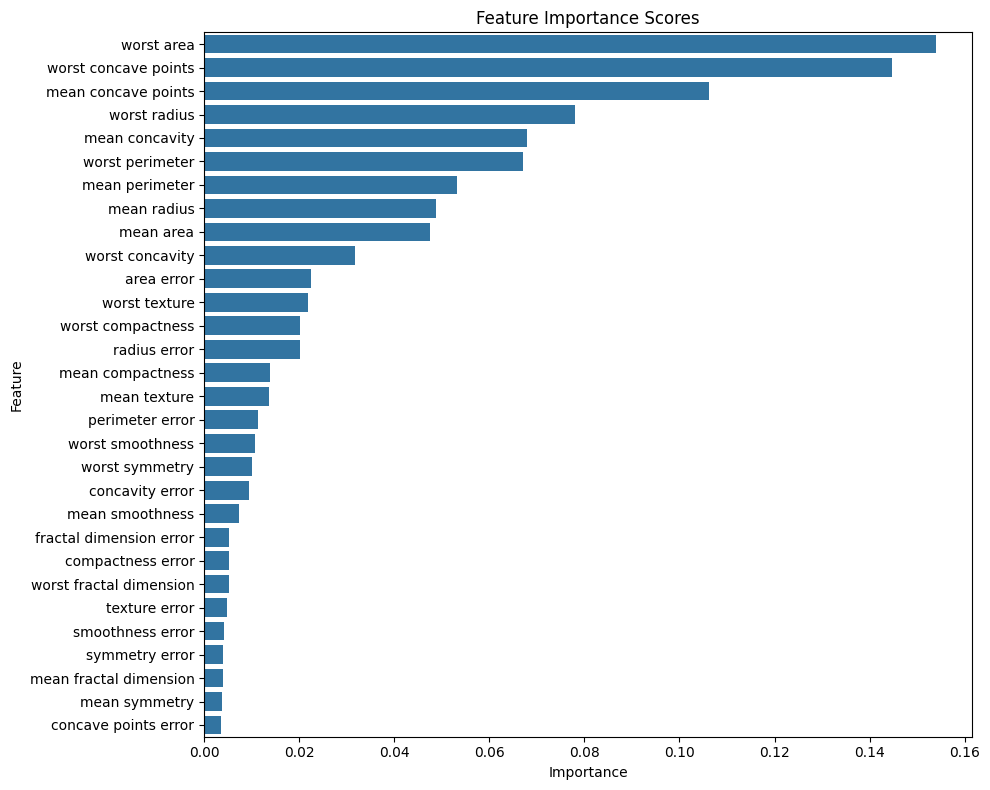

In [ ]:
# Q23.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
feature_names = breast_cancer.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
# n_estimators is the number of trees in the forest
# random_state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a pandas Series for better visualization of feature importances
feature_importances_series = pd.Series(importances, index=feature_names)

# Sort feature importances in descending order
sorted_importances = feature_importances_series.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores (Random Forest Classifier - Breast Cancer Dataset):")
print(sorted_importances)

# Optional: Evaluate the model's accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Random Forest Classifier: {accuracy:.4f}")

# Optional: Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title("Feature Importance Scores")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# Q24.Train a Random Forest Regressor and compare its performance with a single Decision Tree?
# Generate a sample regression dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Import the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


X_reg, y_reg = make_regression(n_samples=1000, n_features=15, n_informative=10, noise=15.0, random_state=42)

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 1. Train a single Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)
y_pred_dt = dt_regressor.predict(X_test_reg)
mse_dt = mean_squared_error(y_test_reg, y_pred_dt)
print(f"Mean Squared Error (MSE) of single Decision Tree Regressor: {mse_dt:.4f}")

# 2. Train a Random Forest Regressor
# n_estimators is the number of trees in the forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_regressor.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_regressor.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
print(f"Mean Squared Error (MSE) of Random Forest Regressor: {mse_rf:.4f}")

# Compare performance
print("\nComparison:")
print(f"Single Decision Tree MSE: {mse_dt:.4f}")
print(f"Random Forest Regressor MSE: {mse_rf:.4f}")

if mse_rf < mse_dt:
  print("Random Forest Regressor performed better (lower MSE).")
elif mse_rf > mse_dt:
  print("Single Decision Tree Regressor performed better (lower MSE).")
else:
  print("Both models performed equally well.")

Mean Squared Error (MSE) of single Decision Tree Regressor: 11678.6075
Mean Squared Error (MSE) of Random Forest Regressor: 4403.6228

Comparison:
Single Decision Tree MSE: 11678.6075
Random Forest Regressor MSE: 4403.6228
Random Forest Regressor performed better (lower MSE).


In [ ]:
# Q25.Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier?

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the dataset into training and testing sets
# Note: For OOB score calculation, we primarily use the training data
# but splitting allows for eventual testing if needed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier with OOB scoring enabled
# oob_score=True calculates the OOB accuracy
# n_estimators is the number of trees in the forest
# random_state for reproducibility
# n_jobs=-1 uses all available cores for faster training
rf_model_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42, n_jobs=-1)

# Train the Random Forest Classifier
rf_model_oob.fit(X_train, y_train)

# Print the Out-of-Bag (OOB) score
# The oob_score_ attribute stores the calculated OOB score
print(f"Out-of-Bag (OOB) Score of the Random Forest Classifier: {rf_model_oob.oob_score_:.4f}")

# Optional: Evaluate the model on the test set as a comparison
y_pred_test = rf_model_oob.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the Test Set: {test_accuracy:.4f}")

Out-of-Bag (OOB) Score of the Random Forest Classifier: 0.9075
Accuracy on the Test Set: 0.9000


In [ ]:
# Q26.Train a Bagging Classifier using SVM as a base estimator and print accuracy?
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Import necessary metrics, including classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a sample dataset (if not already available from previous code)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base Support Vector Classifier (SVC)
# Using probability=True is often required for BaggingClassifer's voting='soft'
# but not strictly necessary for voting='hard' (which is default).
# For simplicity, we can start with default SVC parameters.
base_svm_classifier = SVC(random_state=42, probability=True)

# Create a Bagging Classifier with the SVM base estimator
# n_estimators is the number of base SVM models to train
# max_samples specifies the number of samples to draw from X_train for each base estimator
# bootstrap=True means sampling with replacement (standard Bagging)
# n_jobs=-1 uses all available cores for faster training
bagging_svm_model = BaggingClassifier(estimator=base_svm_classifier, n_estimators=10, max_samples=1.0, bootstrap=True, random_state=42, n_jobs=-1)

# Train the Bagging Classifier
print("Training Bagging Classifier with SVM base estimator...")
bagging_svm_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred_svm = bagging_svm_model.predict(X_test)

# Calculate and print the accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of the Bagging Classifier with SVM: {accuracy_svm:.4f}")

# Optional: Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Training Bagging Classifier with SVM base estimator...
Training complete.
Accuracy of the Bagging Classifier with SVM: 0.9250

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       106
           1       0.90      0.95      0.92        94

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200


Confusion Matrix:
[[96 10]
 [ 5 89]]


Training Random Forest with different numbers of trees:
  Training with 10 trees...
    Accuracy: 0.9561
  Training with 50 trees...
    Accuracy: 0.9649
  Training with 100 trees...
    Accuracy: 0.9649
  Training with 200 trees...
    Accuracy: 0.9649
  Training with 500 trees...
    Accuracy: 0.9649

--- Accuracy Comparison ---
Number of Trees: 10, Accuracy: 0.9561
Number of Trees: 50, Accuracy: 0.9649
Number of Trees: 100, Accuracy: 0.9649
Number of Trees: 200, Accuracy: 0.9649
Number of Trees: 500, Accuracy: 0.9649


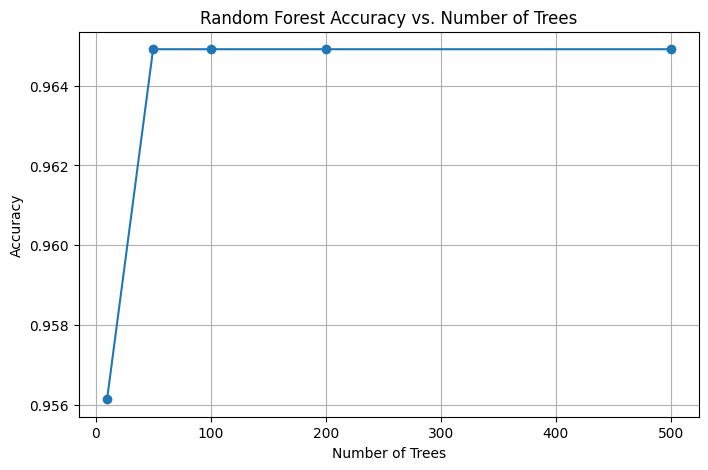

In [ ]:
# Q27.Train a Random Forest Classifier with different numbers of trees and compare accuracy?
import matplotlib.pyplot as plt
# Train Random Forest with different numbers of trees and compare accuracy

# Load the Breast Cancer dataset (if not already loaded)
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of different numbers of trees to try
n_estimators_list = [10, 50, 100, 200, 500]

# Dictionary to store accuracies for each number of trees
accuracies = {}

print("Training Random Forest with different numbers of trees:")

for n_estimators in n_estimators_list:
  print(f"  Training with {n_estimators} trees...")
  # Create a Random Forest Classifier with the current number of trees
  rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1) # n_jobs=-1 for parallel processing

  # Train the Random Forest Classifier
  rf_model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = rf_model.predict(X_test)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)

  # Store the accuracy
  accuracies[n_estimators] = accuracy

  print(f"    Accuracy: {accuracy:.4f}")

# Print the results
print("\n--- Accuracy Comparison ---")
for n, acc in accuracies.items():
  print(f"Number of Trees: {n}, Accuracy: {acc:.4f}")

# Optional: Plot the accuracies
plt.figure(figsize=(8, 5))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
# Q28.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score?
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score # Import accuracy_score for optional print


# Generate a sample classification dataset (if not already available)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base Logistic Regression estimator
# Setting solver='liblinear' might limit functionality like predict_proba.
# Default solver ('lbfgs') supports probability predictions required for AUC.
# Remove the 'probability' argument as it's not needed/supported in newer versions.
# BaggingClassifier handles the predict_proba for the ensemble if the base estimator supports it.
base_lr_classifier = LogisticRegression(random_state=42, solver='lbfgs') # Use default or 'lbfgs' solver which supports predict_proba


# Create a Bagging Classifier with Logistic Regression as the base estimator
# n_estimators is the number of base Logistic Regression models to train
# max_samples specifies the number of samples to draw from X_train for each base estimator
# bootstrap=True means sampling with replacement (standard Bagging)
# n_jobs=-1 uses all available cores for faster training
bagging_lr_model = BaggingClassifier(estimator=base_lr_classifier, n_estimators=10, max_samples=1.0, bootstrap=True, random_state=42, n_jobs=-1)

# Train the Bagging Classifier
print("Training Bagging Classifier with Logistic Regression base estimator...")
bagging_lr_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set to get probabilities (needed for AUC)
# The predict_proba method of the BaggingClassifier will call the predict_proba
# of the base estimators and average them (for 'hard' voting) or sum them (for 'soft' voting).
# It's available if the base estimator has predict_proba.
y_pred_proba = bagging_lr_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print the AUC score
print(f"AUC Score of the Bagging Classifier with Logistic Regression: {auc_score:.4f}")

# Optional: Print accuracy as well for context
y_pred = bagging_lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Bagging Classifier with Logistic Regression: {accuracy:.4f}")

Training Bagging Classifier with Logistic Regression base estimator...
Training complete.
AUC Score of the Bagging Classifier with Logistic Regression: 0.9112
Accuracy of the Bagging Classifier with Logistic Regression: 0.8200


Training Random Forest Regressor...
Training complete.

Feature Importance Scores (Random Forest Regressor):
Feature_6     0.271552
Feature_2     0.262262
Feature_3     0.209903
Feature_10    0.083621
Feature_5     0.038490
Feature_15    0.029242
Feature_9     0.022688
Feature_4     0.012460
Feature_11    0.010944
Feature_13    0.010377
Feature_14    0.010202
Feature_12    0.009923
Feature_7     0.009656
Feature_1     0.009567
Feature_8     0.009112
dtype: float64

Mean Squared Error (MSE) of the Random Forest Regressor: 4403.6228


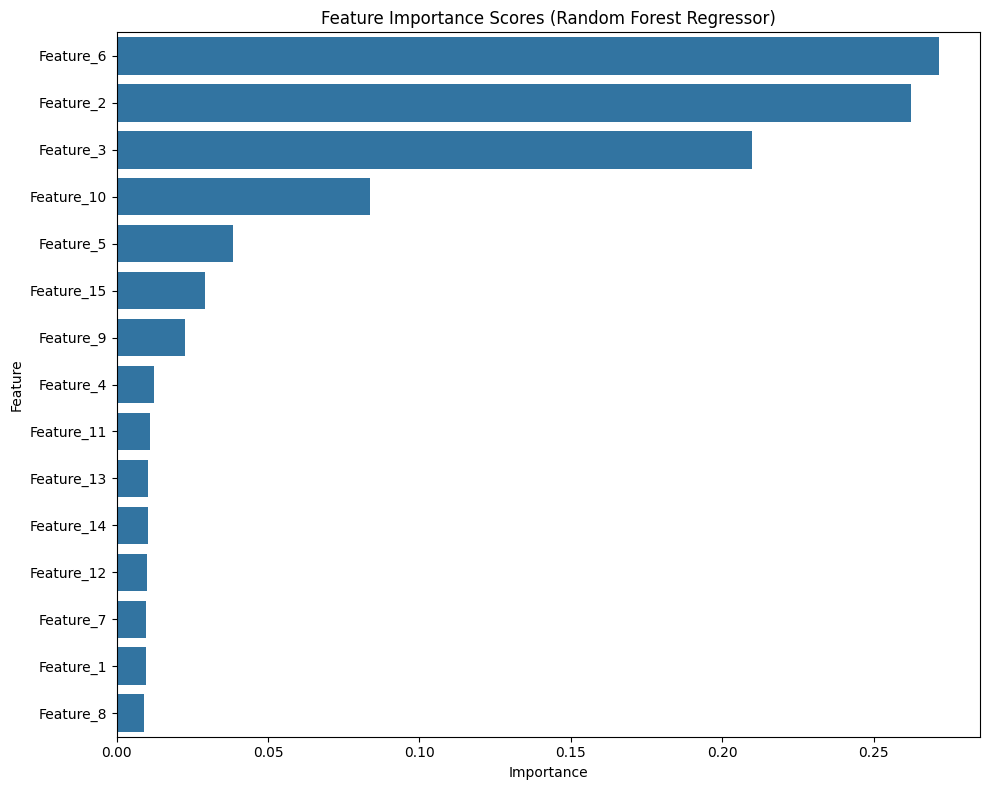

In [ ]:
# Q29.Train a Random Forest Regressor and analyze feature importance score?
import pandas as pd
import matplotlib.pyplot as plt
# Q29.Train a Random Forest Regressor and analyze feature importance score?

# Generate a sample regression dataset (if not already available)
X_reg, y_reg = make_regression(n_samples=1000, n_features=15, n_informative=10, noise=15.0, random_state=42)
# Create dummy feature names for demonstration
feature_names_reg = [f'Feature_{i+1}' for i in range(X_reg.shape[1])]


# Split the dataset into training and testing sets (if not already done)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
# n_estimators is the number of trees in the forest
# random_state for reproducibility
# n_jobs=-1 uses all available cores for faster training
rf_regressor_imp = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Random Forest Regressor
print("Training Random Forest Regressor...")
rf_regressor_imp.fit(X_train_reg, y_train_reg)
print("Training complete.")

# Get feature importances
importances_reg = rf_regressor_imp.feature_importances_

# Create a pandas Series for better visualization of feature importances
feature_importances_series_reg = pd.Series(importances_reg, index=feature_names_reg)

# Sort feature importances in descending order
sorted_importances_reg = feature_importances_series_reg.sort_values(ascending=False)

# Print the feature importance scores
print("\nFeature Importance Scores (Random Forest Regressor):")
print(sorted_importances_reg)

# Optional: Evaluate the model's performance (e.g., MSE)
y_pred_reg_imp = rf_regressor_imp.predict(X_test_reg)
mse_reg_imp = mean_squared_error(y_test_reg, y_pred_reg_imp)
print(f"\nMean Squared Error (MSE) of the Random Forest Regressor: {mse_reg_imp:.4f}")

# Optional: Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances_reg, y=sorted_importances_reg.index)
plt.title("Feature Importance Scores (Random Forest Regressor)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# Q30.Train an ensemble model using both Bagging and Random Forest and compare accuracy.
# Load the Breast Cancer dataset (if not already loaded)
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train a Bagging Classifier (using Decision Tree as base estimator) ---

# Create a base Decision Tree classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier
# n_estimators is the number of base estimators (Decision Trees in this case)
bagging_model = BaggingClassifier(estimator=base_classifier, n_estimators=100, random_state=42, n_jobs=-1)

# Train the Bagging Classifier
print("Training Bagging Classifier...")
bagging_model.fit(X_train, y_train)
print("Bagging Classifier training complete.")

# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"\nAccuracy of the Bagging Classifier: {accuracy_bagging:.4f}")


# --- Train a Random Forest Classifier ---

# Create a Random Forest Classifier
# n_estimators is the number of trees in the forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model.fit(X_train, y_train)
print("Random Forest Classifier training complete.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest Classifier: {accuracy_rf:.4f}")

# --- Compare Accuracies ---
print("\n--- Accuracy Comparison ---")
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")

if accuracy_rf > accuracy_bagging:
    print("Random Forest Classifier performed better.")
elif accuracy_bagging > accuracy_rf:
    print("Bagging Classifier performed better.")
else:
    print("Both models performed equally well.")

Training Bagging Classifier...
Bagging Classifier training complete.

Accuracy of the Bagging Classifier: 0.9561
Training Random Forest Classifier...
Random Forest Classifier training complete.
Accuracy of the Random Forest Classifier: 0.9649

--- Accuracy Comparison ---
Bagging Classifier Accuracy: 0.9561
Random Forest Classifier Accuracy: 0.9649
Random Forest Classifier performed better.


In [ ]:
# Q31.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV?

from sklearn.model_selection import GridSearchCV

# Load the Breast Cancer dataset (if not already loaded)
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
# Common hyperparameters to tune for RandomForestClassifier include:
# n_estimators: The number of trees in the forest. More trees usually improve performance
#               but increase computation.
# max_features: The number of features to consider when looking for the best split.
#               'sqrt' is common for classification.
# max_depth: The maximum depth of the tree. Controls overfitting.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
param_grid = {
    'n_estimators': [50, 100, 200], # Fewer options for faster tuning
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, None], # None means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
}

# Create GridSearchCV object
# estimator: The model to tune (Random Forest)
# param_grid: The dictionary of hyperparameters and their values to search
# cv: Number of folds for cross-validation (e.g., 5-fold cross-validation)
# scoring: The metric to optimize (e.g., 'accuracy' for classification)
# n_jobs: Number of jobs to run in parallel (-1 means use all available cores)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
print("Performing GridSearchCV for Random Forest Classifier hyperparameter tuning...")
grid_search.fit(X_train, y_train)
print("GridSearchCV complete.")

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("\nBest Hyperparameters found by GridSearchCV:")
print(best_params)

# Get the best model trained with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tuned = best_rf_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"\nAccuracy of the Tuned Random Forest Classifier on the test set: {accuracy_tuned:.4f}")

# Optional: You can also check the best score obtained during cross-validation
print(f"Best cross-validation accuracy score: {grid_search.best_score_:.4f}")

# Optional: Compare with a default Random Forest model
default_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
default_rf_model.fit(X_train, y_train)
y_pred_default = default_rf_model.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"\nAccuracy of the Default Random Forest Classifier on the test set: {accuracy_default:.4f}")

if accuracy_tuned > accuracy_default:
    print("Hyperparameter tuning improved the accuracy.")
elif accuracy_default > accuracy_tuned:
    print("Default model had better or equal accuracy.")
else:
    print("Hyperparameter tuning did not change the accuracy significantly.")



Performing GridSearchCV for Random Forest Classifier hyperparameter tuning...
GridSearchCV complete.

Best Hyperparameters found by GridSearchCV:
{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Accuracy of the Tuned Random Forest Classifier on the test set: 0.9737
Best cross-validation accuracy score: 0.9670

Accuracy of the Default Random Forest Classifier on the test set: 0.9649
Hyperparameter tuning improved the accuracy.


Training Bagging Regressor with different numbers of base estimators:
  Training with 10 base estimators...
    Mean Squared Error (MSE): 4994.5719
  Training with 50 base estimators...
    Mean Squared Error (MSE): 4280.8249
  Training with 100 base estimators...
    Mean Squared Error (MSE): 4276.5527
  Training with 200 base estimators...
    Mean Squared Error (MSE): 4234.5184
  Training with 500 base estimators...
    Mean Squared Error (MSE): 4279.6597

--- Performance Comparison (Bagging Regressor MSE) ---
Number of Base Estimators: 10, MSE: 4994.5719
Number of Base Estimators: 50, MSE: 4280.8249
Number of Base Estimators: 100, MSE: 4276.5527
Number of Base Estimators: 200, MSE: 4234.5184
Number of Base Estimators: 500, MSE: 4279.6597


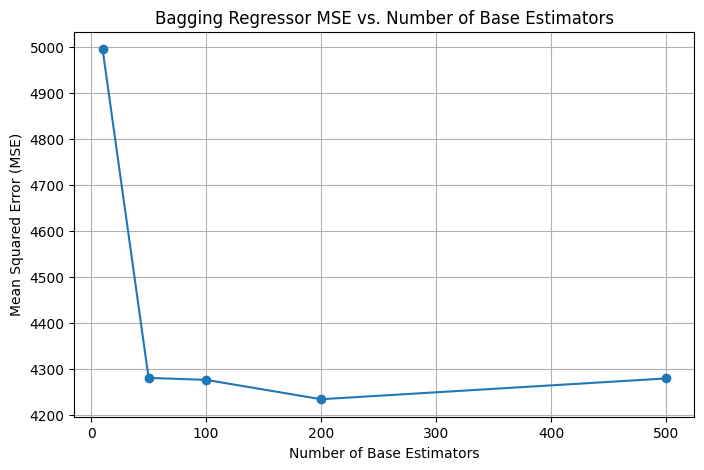

In [ ]:
# Q32.Train a Bagging Regressor with different numbers of base estimators and compare performance?
import matplotlib.pyplot as plt
# Define a list of different numbers of base estimators to try
n_estimators_list = [10, 50, 100, 200, 500]

# Dictionary to store MSE for each number of estimators
mse_scores = {}

# Create a base Decision Tree Regressor (same base estimator for all Bagging models)
base_regressor = DecisionTreeRegressor(random_state=42)

print("Training Bagging Regressor with different numbers of base estimators:")

for n_estimators in n_estimators_list:
  print(f"  Training with {n_estimators} base estimators...")
  # Create a Bagging Regressor with the current number of estimators
  bagging_regressor = BaggingRegressor(estimator=base_regressor, n_estimators=n_estimators, random_state=42, n_jobs=-1) # n_jobs=-1 for parallel processing

  # Train the Bagging Regressor
  bagging_regressor.fit(X_train_reg, y_train_reg) # Using the regression data from Q24

  # Make predictions on the test set
  y_pred_reg = bagging_regressor.predict(X_test_reg) # Using the regression data from Q24

  # Calculate Mean Squared Error (MSE)
  mse = mean_squared_error(y_test_reg, y_pred_reg) # Using the regression data from Q24

  # Store the MSE
  mse_scores[n_estimators] = mse

  print(f"    Mean Squared Error (MSE): {mse:.4f}")

# Print the results
print("\n--- Performance Comparison (Bagging Regressor MSE) ---")
for n, mse in mse_scores.items():
  print(f"Number of Base Estimators: {n}, MSE: {mse:.4f}")

# Optional: Plot the MSE scores
plt.figure(figsize=(8, 5))
plt.plot(list(mse_scores.keys()), list(mse_scores.values()), marker='o')
plt.title("Bagging Regressor MSE vs. Number of Base Estimators")
plt.xlabel("Number of Base Estimators")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

In [ ]:
# Q33.Train a Random Forest Classifier and analyze misclassified samples?
import pandas as pd
# Get predictions from the trained Random Forest model (from Q33's training)
# y_pred = rf_model.predict(X_test) # This was the incorrect line
y_pred = best_rf_model.predict(X_test) # Use the best fitted model from GridSearchCV

# Identify misclassified samples
# Create a boolean mask where True indicates a misclassification
misclassified_mask = (y_pred != y_test)

# Use the mask to select the misclassified samples from the test set
X_misclassified = X_test[misclassified_mask]
y_true_misclassified = y_test[misclassified_mask]
y_pred_misclassified = y_pred[misclassified_mask]

print(f"\nNumber of misclassified samples: {X_misclassified.shape[0]}")

# Analyze the characteristics of misclassified samples
if X_misclassified.shape[0] > 0:
  print("\nAnalysis of Misclassified Samples:")

  # You can perform various analyses here. Examples:

  # 1. Look at the features of some misclassified samples
  print("\nFirst 5 misclassified samples (features):")
  print(pd.DataFrame(X_misclassified[:5], columns=breast_cancer.feature_names))
  print("\nCorresponding true labels and predicted labels for these 5 samples:")
  print(pd.DataFrame({'True Label': y_true_misclassified[:5], 'Predicted Label': y_pred_misclassified[:5]}))


  # 2. Analyze the distribution of true labels for misclassified samples
  print("\nDistribution of true labels among misclassified samples:")
  print(pd.Series(y_true_misclassified).value_counts().sort_index())

  # 3. Analyze the distribution of predicted labels for misclassified samples
  print("\nDistribution of predicted labels among misclassified samples:")
  print(pd.Series(y_pred_misclassified).value_counts().sort_index())

  # 4. Analyze feature values for misclassified vs correctly classified samples
  # You could create dataframes for misclassified and correctly classified samples
  # and compare their feature distributions (e.g., using histograms or box plots)

  # Example: Compare mean of a few important features (from Q23 analysis)
  # For breast cancer, mean radius, worst perimeter, mean concave points are often important
  important_features = ['mean radius', 'worst perimeter', 'mean concave points']

  # Get correctly classified samples
  X_correctly_classified = X_test[~misclassified_mask]
  y_true_correctly_classified = y_test[~misclassified_mask]

  df_test = pd.DataFrame(X_test, columns=breast_cancer.feature_names)
  df_test['Misclassified'] = misclassified_mask.astype(int)
  df_test['True_Label'] = y_test
  df_test['Predicted_Label'] = y_pred

  print(f"\nMean values of some important features for misclassified vs correctly classified samples:")
  for feature in important_features:
      mean_misclassified = df_test[df_test['Misclassified'] == 1][feature].mean()
      mean_correctly_classified = df_test[df_test['Misclassified'] == 0][feature].mean()
      print(f"  {feature}: Misclassified Mean = {mean_misclassified:.4f}, Correctly Classified Mean = {mean_correctly_classified:.4f}")

  # This analysis helps understand if there are specific characteristics (e.g., feature values, classes)
  # that make samples harder for the model to classify correctly.
  # This information can be used to improve the model (e.g., collect more data for certain classes,
  # try different features, or use different model architectures).

else:
  print("No misclassified samples to analyze.")


Number of misclassified samples: 3

Analysis of Misclassified Samples:

First 5 misclassified samples (features):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0           0.1078   
1        13.80         15.79           90.43      584.1           0.1007   
2        13.96         17.05           91.43      602.4           0.1096   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.1535         0.11690              0.06987         0.1942   
1            0.1280         0.07789              0.05069         0.1662   
2            0.1279         0.09789              0.05246         0.1908   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.06902  ...         15.53          23.19            96.66   
1                 0.06566  ...         16.57          20.86           110.30   
2                 0.06130  ...         

In [ ]:
# Q34.Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier?
# Load the Breast Cancer dataset (if not already loaded)
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a single Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of a single Decision Tree Classifier: {accuracy_dt:.4f}")

# 2. Train a Bagging Classifier
# Create a base Decision Tree classifier (using the same base as the single tree for fair comparison)
base_dt_for_bagging = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier
# n_estimators is the number of base Decision Trees in the ensemble
# random_state for reproducibility
# n_jobs=-1 uses all available cores for faster training
bagging_classifier = BaggingClassifier(estimator=base_dt_for_bagging, n_estimators=100, random_state=42, n_jobs=-1)

# Train the Bagging Classifier
print("Training Bagging Classifier...")
bagging_classifier.fit(X_train, y_train)
print("Bagging Classifier training complete.")

# Make predictions on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Calculate accuracy for Bagging Classifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy of the Bagging Classifier (with Decision Tree base): {accuracy_bagging:.4f}")

# Compare performance
print("\n--- Performance Comparison ---")
print(f"Single Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

if accuracy_bagging > accuracy_dt:
    print("Bagging Classifier performed better.")
elif accuracy_dt > accuracy_bagging:
    print("Single Decision Tree Classifier performed better or equally well.")
else:
    print("Both models performed equally well.")

# Optional: Print detailed reports for both
print("\n--- Single Decision Tree Classification Report ---")
print(classification_report(y_test, y_pred_dt))

print("\n--- Bagging Classifier Classification Report ---")
print(classification_report(y_test, y_pred_bagging))

Accuracy of a single Decision Tree Classifier: 0.9474
Training Bagging Classifier...
Bagging Classifier training complete.
Accuracy of the Bagging Classifier (with Decision Tree base): 0.9561

--- Performance Comparison ---
Single Decision Tree Accuracy: 0.9474
Bagging Classifier Accuracy: 0.9561
Bagging Classifier performed better.

--- Single Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


--- Bagging Classifier Classification Report ---
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg      

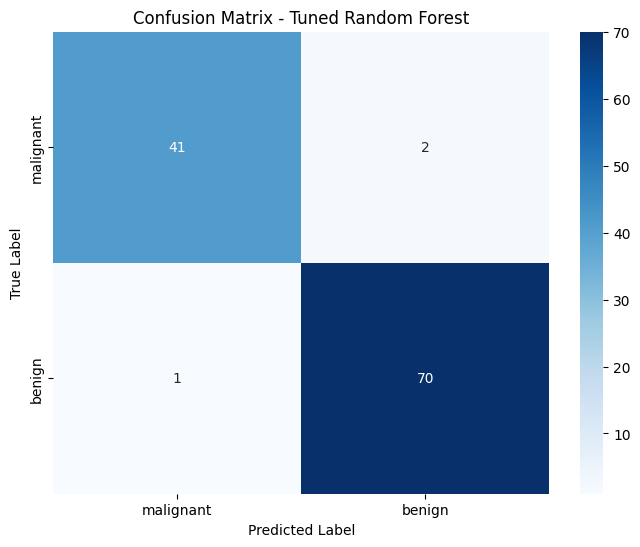


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Q35.Train a Random Forest Classifier and visualize the confusion matrix?
import matplotlib.pyplot as plt
# Make predictions on the test set using the trained Random Forest model (from Q33 or Q31)
# We will use the best_rf_model from Q31's GridSearchCV output for visualization,
# assuming it's the final chosen model. If you didn't run Q31, you could use
# the rf_model from Q23.
# For consistency, let's assume best_rf_model from Q31 is available.
# If not, uncomment the next line and ensure rf_model is trained:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred = rf_model.predict(X_test)

# Ensure best_rf_model is defined and trained from Q31 or use another trained RF model
try:
  y_pred_rf_cm = best_rf_model.predict(X_test)
  model_name = "Tuned Random Forest"
except NameError:
  # Fallback to the RF model from Q23 if Q31 wasn't run
  try:
    y_pred_rf_cm = rf_model.predict(X_test)
    model_name = "Random Forest (Default)"
  except NameError:
    print("Error: Random Forest model not found. Please run a previous cell to train one.")
    # Exit or handle the error appropriately
    exit() # Or raise an exception

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_cm)

# Get class names for labels (assuming breast cancer dataset from previous Qs)
class_names = breast_cancer.target_names

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_cm, target_names=class_names))


In [ ]:
# Q36.Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy?
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer # Using a standard dataset
import pandas as pd # Ensure pandas is imported if not already

# Load a sample dataset (using Breast Cancer as it's suitable for classification)
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Define Base Estimators ---
# These are the models that will make the initial predictions
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)), # probability=True needed for predict_proba in stacking
    ('lr', LogisticRegression(random_state=42, solver='liblinear')) # Using liblinear for potentially faster training with small datasets/binary classification
]

# --- Define the Meta-Estimator (Final Estimator) ---
# This model learns how to combine the predictions of the base estimators
# A common choice is Logistic Regression or a simple classifier.
final_estimator = LogisticRegression(random_state=42, solver='liblinear')

# --- Create the Stacking Classifier ---
# estimators: A list of (name, estimator) tuples for the base models
# final_estimator: The meta-model that combines the base predictions
# cv: Number of cross-validation folds to use for generating predictions for the meta-model
# stack_method: How to generate the data for the meta-model. 'auto' is usually fine.
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Using 5-fold cross-validation for the stacking layer
    n_jobs=-1 # Use all available cores
)

# --- Train the Stacking Classifier ---
print("Training Stacking Classifier...")
stacking_model.fit(X_train, y_train)
print("Stacking Classifier training complete.")

# --- Evaluate the Stacking Classifier ---
y_pred_stacking = stacking_model.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"\nAccuracy of the Stacking Classifier: {accuracy_stacking:.4f}")

# --- Compare with individual base models (Optional) ---

# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of the individual Decision Tree: {accuracy_dt:.4f}")

# 2. SVM
# Using probability=True because the stacking model used it.
# If you were training this individually, probability=False might be faster.
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of the individual SVM: {accuracy_svm:.4f}")

# 3. Logistic Regression
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the individual Logistic Regression: {accuracy_lr:.4f}")

# --- Overall Comparison ---
print("\n--- Accuracy Comparison ---")
print(f"Stacking Classifier Accuracy: {accuracy_stacking:.4f}")
print(f"Decision Tree Accuracy:     {accuracy_dt:.4f}")
print(f"SVM Accuracy:               {accuracy_svm:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Optional: Print classification report for the Stacking model
print("\n--- Stacking Classifier Classification Report ---")
print(classification_report(y_test, y_pred_stacking, target_names=breast_cancer.target_names))


Training Stacking Classifier...
Stacking Classifier training complete.

Accuracy of the Stacking Classifier: 0.9649
Accuracy of the individual Decision Tree: 0.9474
Accuracy of the individual SVM: 0.9474
Accuracy of the individual Logistic Regression: 0.9561

--- Accuracy Comparison ---
Stacking Classifier Accuracy: 0.9649
Decision Tree Accuracy:     0.9474
SVM Accuracy:               0.9474
Logistic Regression Accuracy: 0.9561

--- Stacking Classifier Classification Report ---
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        43
      benign       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Using the tuned Random Forest model for feature importance.

Top 5 Most Important Features (Random Forest Classifier):
worst concave points    0.111659
mean concavity          0.106510
worst area              0.095808
mean concave points     0.088410
worst radius            0.083292
dtype: float64


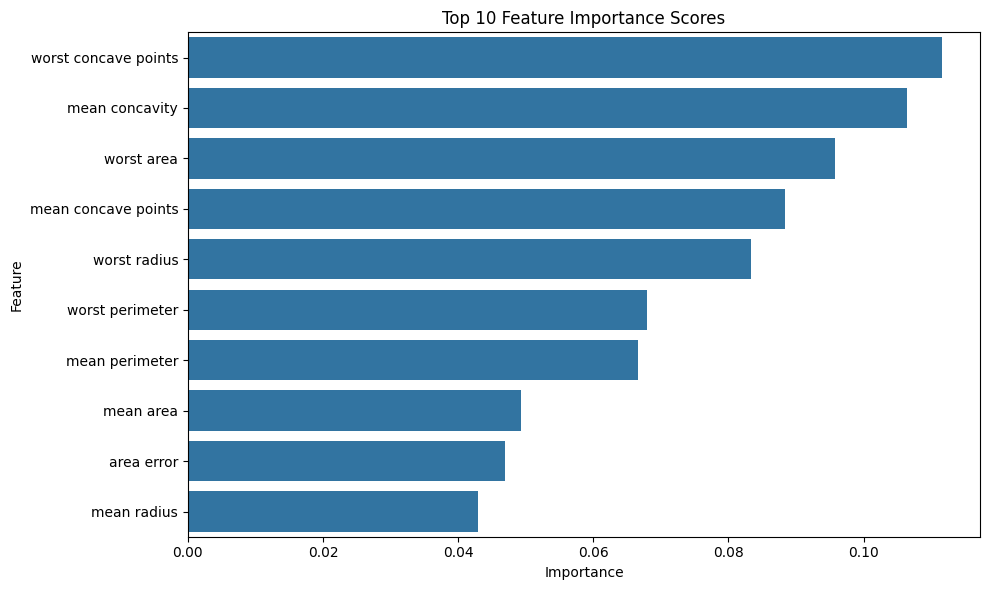

In [ ]:
# Q37.Train a Random Forest Classifier and print the top 5 most important features?
import matplotlib.pyplot as plt
# Assuming the breast_cancer dataset and feature_names are available from previous cells (e.g., Q23)
# If not, load them here:
# from sklearn.datasets import load_breast_cancer
# breast_cancer = load_breast_cancer()
# X, y = breast_cancer.data, breast_cancer.target
# feature_names = breast_cancer.feature_names
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd


# Ensure a Random Forest Classifier is trained. We'll reuse the one from Q31 (best_rf_model)
# If Q31 was not run, train a default one here:
try:
  # Try to use the best model from GridSearchCV if available
  rf_model_for_top_features = best_rf_model
  print("Using the tuned Random Forest model for feature importance.")
except NameError:
  # If not, train a default Random Forest model
  print("Tuned Random Forest model not found, training a default one.")
  rf_model_for_top_features = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
  rf_model_for_top_features.fit(X_train, y_train)


# Get feature importances from the trained Random Forest model
importances = rf_model_for_top_features.feature_importances_

# Create a pandas Series to associate importances with feature names
feature_importances_series = pd.Series(importances, index=feature_names)

# Sort feature importances in descending order
sorted_importances = feature_importances_series.sort_values(ascending=False)

# Print the top 5 most important features
print("\nTop 5 Most Important Features (Random Forest Classifier):")
print(sorted_importances.head(5))

# Optional: Plot the top N features
N = 10 # Or any number you want to visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.head(N), y=sorted_importances.head(N).index)
plt.title(f"Top {N} Feature Importance Scores")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# Q38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score?
# Create a base Decision Tree classifier
base_classifier_eval = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier
# n_estimators is the number of base estimators (Decision Trees in this case)
bagging_model_eval = BaggingClassifier(estimator=base_classifier_eval, n_estimators=100, random_state=42, n_jobs=-1)

# Train the Bagging Classifier
print("Training Bagging Classifier for evaluation...")
bagging_model_eval.fit(X_train, y_train) # Using the breast cancer data from previous Qs
print("Bagging Classifier training complete.")

# Make predictions on the test set
y_pred_bagging_eval = bagging_model_eval.predict(X_test) # Using the breast cancer data from previous Qs

# Evaluate performance using Precision, Recall, and F1-score
print("\nEvaluation Metrics for Bagging Classifier:")
print(classification_report(y_test, y_pred_bagging_eval, target_names=breast_cancer.target_names))

# Optional: Print Confusion Matrix for context
print("\nConfusion Matrix for Bagging Classifier:")
print(confusion_matrix(y_test, y_pred_bagging_eval))

Training Bagging Classifier for evaluation...
Bagging Classifier training complete.

Evaluation Metrics for Bagging Classifier:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix for Bagging Classifier:
[[40  3]
 [ 2 69]]


Analyzing the effect of max_depth on Random Forest accuracy:
  Training with max_depth=2...
    Accuracy: 0.9649
  Training with max_depth=4...
    Accuracy: 0.9649
  Training with max_depth=6...
    Accuracy: 0.9649
  Training with max_depth=8...
    Accuracy: 0.9649
  Training with max_depth=10...
    Accuracy: 0.9649
  Training with max_depth=None...
    Accuracy: 0.9649

--- Accuracy vs. max_depth Comparison ---
max_depth: 2, Accuracy: 0.9649
max_depth: 4, Accuracy: 0.9649
max_depth: 6, Accuracy: 0.9649
max_depth: 8, Accuracy: 0.9649
max_depth: 10, Accuracy: 0.9649
max_depth: None, Accuracy: 0.9649


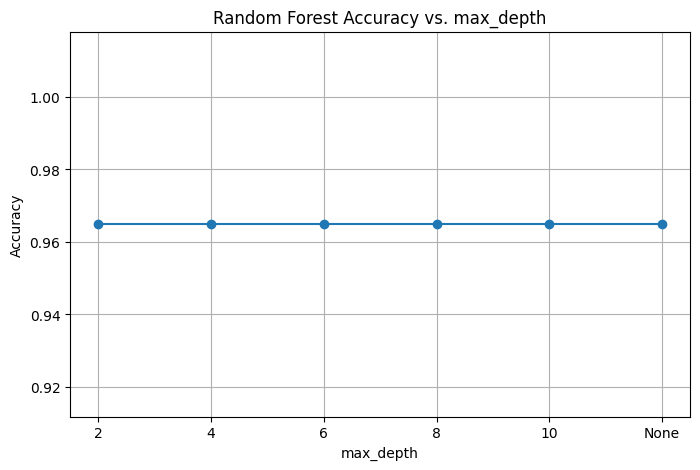

In [ ]:
# Q39.Train a Random Forest Classifier and analyze the effect of max_depth on accuracy?
import matplotlib.pyplot as plt
# Define a list of different max_depth values to try
max_depth_list = [2, 4, 6, 8, 10, None] # None means unlimited depth

# Dictionary to store accuracies for each max_depth
accuracies_depth = {}

print("Analyzing the effect of max_depth on Random Forest accuracy:")

for depth in max_depth_list:
  print(f"  Training with max_depth={depth}...")
  # Create a Random Forest Classifier with the current max_depth
  # Using n_estimators=100 as a fixed value
  rf_model_depth = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, n_jobs=-1)

  # Train the Random Forest Classifier
  rf_model_depth.fit(X_train, y_train) # Using the breast cancer data from previous Qs

  # Make predictions on the test set
  y_pred_depth = rf_model_depth.predict(X_test) # Using the breast cancer data from previous Qs

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_depth)

  # Store the accuracy
  accuracies_depth[depth] = accuracy

  print(f"    Accuracy: {accuracy:.4f}")

# Print the results
print("\n--- Accuracy vs. max_depth Comparison ---")
for depth, acc in accuracies_depth.items():
  print(f"max_depth: {depth}, Accuracy: {acc:.4f}")

# Optional: Plot the accuracies
plt.figure(figsize=(8, 5))
# Handle None explicitly for plotting purposes, maybe represent as a large number or separate point
plot_depths = [d if d is not None else 12 for d in max_depth_list] # Represent None as 12 for plotting
plt.plot(plot_depths, list(accuracies_depth.values()), marker='o')
plt.xticks(plot_depths, labels=[str(d) for d in max_depth_list]) # Set custom tick labels
plt.title("Random Forest Accuracy vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [27]:
# Q40.Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset (if not already available)
X_reg, y_reg = make_regression(n_samples=1000, n_features=15, n_informative=10, noise=15.0, random_state=42)

# Split the dataset into training and testing sets (if not already done)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 1. Train a Bagging Regressor with Decision Tree as the base estimator
base_dt_regressor = DecisionTreeRegressor(random_state=42)
bagging_dt_regressor = BaggingRegressor(estimator=base_dt_regressor, n_estimators=50, random_state=42, n_jobs=-1)

print("Training Bagging Regressor with Decision Tree base estimator...")
bagging_dt_regressor.fit(X_train_reg, y_train_reg)
print("Bagging Regressor (Decision Tree) training complete.")

y_pred_bagging_dt = bagging_dt_regressor.predict(X_test_reg)
mse_bagging_dt = mean_squared_error(y_test_reg, y_pred_bagging_dt)
print(f"Mean Squared Error (MSE) of Bagging Regressor (Decision Tree): {mse_bagging_dt:.4f}")

# 2. Train a Bagging Regressor with KNeighbors Regressor as the base estimator
# KNeighbors Regressor is less prone to overfitting than a deep DT, Bagging might have
# less impact on variance reduction compared to DT base.
base_knn_regressor = KNeighborsRegressor(n_neighbors=5) # Choose a reasonable number of neighbors
bagging_knn_regressor = BaggingRegressor(estimator=base_knn_regressor, n_estimators=50, random_state=42, n_jobs=-1)

print("\nTraining Bagging Regressor with KNeighbors Regressor base estimator...")
bagging_knn_regressor.fit(X_train_reg, y_train_reg)
print("Bagging Regressor (KNeighbors) training complete.")

y_pred_bagging_knn = bagging_knn_regressor.predict(X_test_reg)
mse_bagging_knn = mean_squared_error(y_test_reg, y_pred_bagging_knn)
print(f"Mean Squared Error (MSE) of Bagging Regressor (KNeighbors Regressor): {mse_bagging_knn:.4f}")


# Compare performance
print("\n--- Performance Comparison (Bagging Regressors MSE) ---")
print(f"Bagging Regressor (Decision Tree Base) MSE:   {mse_bagging_dt:.4f}")
print(f"Bagging Regressor (KNeighbors Regressor Base) MSE: {mse_bagging_knn:.4f}")

if mse_bagging_dt < mse_bagging_knn:
    print("Bagging Regressor with Decision Tree base performed better (lower MSE).")
elif mse_bagging_knn < mse_bagging_dt:
    print("Bagging Regressor with KNeighbors Regressor base performed better (lower MSE).")
else:
    print("Both Bagging Regressors performed equally well.")

Training Bagging Regressor with Decision Tree base estimator...
Bagging Regressor (Decision Tree) training complete.
Mean Squared Error (MSE) of Bagging Regressor (Decision Tree): 4280.8249

Training Bagging Regressor with KNeighbors Regressor base estimator...
Bagging Regressor (KNeighbors) training complete.
Mean Squared Error (MSE) of Bagging Regressor (KNeighbors Regressor): 6889.8063

--- Performance Comparison (Bagging Regressors MSE) ---
Bagging Regressor (Decision Tree Base) MSE:   4280.8249
Bagging Regressor (KNeighbors Regressor Base) MSE: 6889.8063
Bagging Regressor with Decision Tree base performed better (lower MSE).


In [28]:
# Q41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
# Assuming the breast_cancer dataset and feature_names are available from previous cells (e.g., Q23)
# If not, load them here:
# from sklearn.datasets import load_breast_cancer
# breast_cancer = load_breast_cancer()
# X, y = breast_cancer.data, breast_cancer.target
# feature_names = breast_cancer.feature_names
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import accuracy_score # For optional print

# Create a Random Forest Classifier
# n_estimators is the number of trees in the forest
# random_state for reproducibility
# n_jobs=-1 uses all available cores for faster training
rf_model_auc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Random Forest Classifier
print("Training Random Forest Classifier for AUC evaluation...")
rf_model_auc.fit(X_train, y_train) # Using the breast cancer data from previous Qs
print("Random Forest Classifier training complete.")

# Predict probabilities for the positive class on the test set
# ROC-AUC score requires probability estimates, not just class labels.
# The predict_proba method returns probabilities for each class.
# We need the probability for the positive class (class 1 in this binary case).
y_pred_proba_auc = rf_model_auc.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# Calculate the ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_auc)

# Print the ROC-AUC score
print(f"\nROC-AUC Score of the Random Forest Classifier: {auc_score:.4f}")

# Optional: Print accuracy as well for context
y_pred_auc = rf_model_auc.predict(X_test)
accuracy_auc = accuracy_score(y_test, y_pred_auc)
print(f"Accuracy of the Random Forest Classifier: {accuracy_auc:.4f}")

Training Random Forest Classifier for AUC evaluation...
Random Forest Classifier training complete.

ROC-AUC Score of the Random Forest Classifier: 0.9953
Accuracy of the Random Forest Classifier: 0.9649


In [29]:
# Q42.Train a Bagging Classifier and evaluate its performance using cross-validation.?
from sklearn.model_selection import cross_val_score

# Create a base Decision Tree classifier (or any other classifier)
base_classifier_cv = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier
# n_estimators is the number of base estimators
bagging_model_cv = BaggingClassifier(estimator=base_classifier_cv, n_estimators=100, random_state=42, n_jobs=-1)

# Perform cross-validation
# Use the entire dataset (X, y) for cross-validation
# cv: number of folds (e.g., 5-fold cross-validation)
# scoring: the metric to use (e.g., 'accuracy', 'f1', 'roc_auc')
print("Performing cross-validation for Bagging Classifier...")
cv_scores = cross_val_score(bagging_model_cv, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation complete.")

# Print the cross-validation scores for each fold
print("\nCross-validation scores (Accuracy) for each fold:")
for fold, score in enumerate(cv_scores):
  print(f"  Fold {fold+1}: {score:.4f}")

# Print the mean and standard deviation of the cross-validation scores
print(f"\nMean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

# Optional: You can perform cross-validation with other metrics as well
# cv_scores_f1 = cross_val_score(bagging_model_cv, X, y, cv=5, scoring='f1', n_jobs=-1)
# print(f"\nMean CV F1-score: {cv_scores_f1.mean():.4f}")

# cv_scores_auc = cross_val_score(bagging_model_cv, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
# print(f"Mean CV ROC-AUC: {cv_scores_auc.mean():.4f}")


Performing cross-validation for Bagging Classifier...
Cross-validation complete.

Cross-validation scores (Accuracy) for each fold:
  Fold 1: 0.8947
  Fold 2: 0.9386
  Fold 3: 0.9912
  Fold 4: 0.9649
  Fold 5: 1.0000

Mean CV Accuracy: 0.9579
Standard Deviation of CV Accuracy: 0.0382


Using Random Forest model from previous step for PR curve.


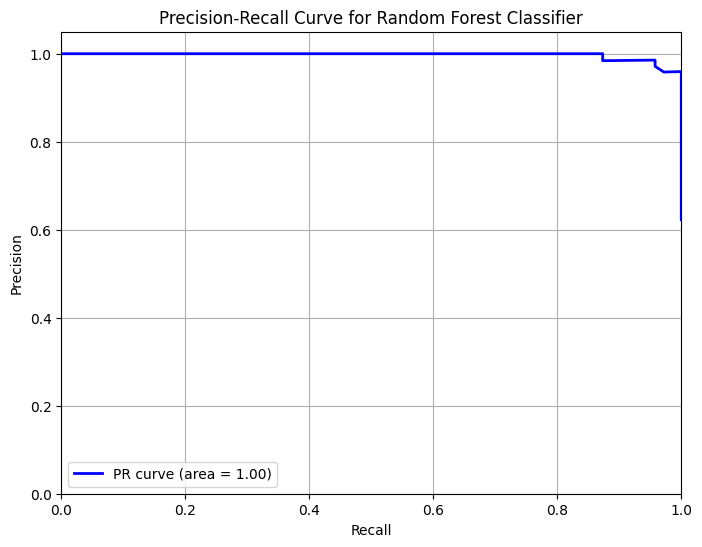

In [30]:
# Q43.Train a Random Forest Classifier and plot the Precision-Recall curve?
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming X_test and y_test are available from previous cells (e.g., Q23)
# If not, split the data here:
# from sklearn.model_selection import train_test_split
# breast_cancer = load_breast_cancer() # Load the dataset if needed
# X, y = breast_cancer.data, breast_cancer.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure a Random Forest Classifier is trained. We'll reuse the one from Q41 or Q31
# If none are available, train a default one here:
try:
  # Try to use the model trained in Q41 (rf_model_auc)
  rf_model_pr = rf_model_auc
  print("Using Random Forest model from previous step for PR curve.")
except NameError:
  # If not, train a default Random Forest model
  print("Random Forest model not found, training a default one for PR curve.")
  rf_model_pr = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
  rf_model_pr.fit(X_train, y_train) # Assuming X_train and y_train are available

# Get the probability predictions for the positive class (class 1)
# The Precision-Recall curve requires probability estimates or decision function values
y_scores = rf_model_pr.predict_proba(X_test)[:, 1]

# Calculate Precision and Recall for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the Area Under the Precision-Recall Curve (AUPRC)
auprc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [32]:
# Q44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.
# Import StackingClassifier
from sklearn.ensemble import StackingClassifier
# Import necessary metrics if not already imported
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Need for base classifier for Bagging example (Q42)
from sklearn.model_selection import train_test_split, cross_val_score # Need for splitting and CV
from sklearn.datasets import load_breast_cancer # Need to load dataset if not available

# Load a sample dataset (using Breast Cancer as it's suitable for classification)
# Assuming breast_cancer, X, y, X_train, X_test, y_train, y_test are available from previous cells
# If not, load and split them here:
try:
    breast_cancer = breast_cancer # Check if already loaded
except NameError:
    print("Loading breast_cancer dataset...")
    from sklearn.datasets import load_breast_cancer
    breast_cancer = load_breast_cancer()
    X, y = breast_cancer.data, breast_cancer.target
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Dataset loaded and split.")


# --- Define Base Estimators ---
# We will use Random Forest and Logistic Regression as base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42, solver='liblinear')) # Using liblinear
]

# --- Define the Meta-Estimator (Final Estimator) ---
# A common choice is Logistic Regression or a simple classifier.
final_estimator = LogisticRegression(random_state=42, solver='liblinear')

# --- Create the Stacking Classifier ---
# estimators: A list of (name, estimator) tuples for the base models
# final_estimator: The meta-model that combines the base predictions
# cv: Number of cross-validation folds to use for generating predictions for the meta-model
# stack_method: How to generate the data for the meta-model. 'auto' is usually fine.
stacking_model_rf_lr = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Using 5-fold cross-validation for the stacking layer
    n_jobs=-1 # Use all available cores
)

# --- Train the Stacking Classifier ---
print("Training Stacking Classifier with Random Forest and Logistic Regression...")
stacking_model_rf_lr.fit(X_train, y_train)
print("Stacking Classifier training complete.")

# --- Evaluate the Stacking Classifier ---
y_pred_stacking_rf_lr = stacking_model_rf_lr.predict(X_test)
accuracy_stacking_rf_lr = accuracy_score(y_test, y_pred_stacking_rf_lr)
print(f"\nAccuracy of the Stacking Classifier (RF + LR): {accuracy_stacking_rf_lr:.4f}")

# --- Compare with individual base models ---

# 1. Random Forest
# Explicitly train the Random Forest model for comparison if it's not already fitted
# We will create a new instance or reuse and refit if necessary
print("Training or reusing Random Forest model for comparison...")
try:
    # Check if rf_model exists AND is fitted
    if hasattr(rf_model, 'n_features_in_'): # A common attribute for fitted estimators
         print("Using already fitted Random Forest model.")
    else:
         # If it exists but is not fitted, refit it
         print("Random Forest model found but not fitted, refitting.")
         rf_model.fit(X_train, y_train)
except NameError:
    # If rf_model does not exist, create and fit it
    print("Random Forest model not found, creating and fitting one for comparison.")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the individual Random Forest:   {accuracy_rf:.4f}")

# 2. Logistic Regression
# Explicitly train the Logistic Regression model for comparison if it's not already fitted
print("Training or reusing Logistic Regression model for comparison...")
try:
    # Check if lr_model exists AND is fitted
    if hasattr(lr_model, 'n_features_in_'): # A common attribute for fitted estimators
         print("Using already fitted Logistic Regression model.")
    else:
         # If it exists but is not fitted, refit it
         print("Logistic Regression model found but not fitted, refitting.")
         lr_model.fit(X_train, y_train)
except NameError:
    # If lr_model does not exist, create and fit it
    print("Logistic Regression model not found, creating and fitting one for comparison.")
    lr_model = LogisticRegression(random_state=42, solver='liblinear')
    lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the individual Logistic Regression: {accuracy_lr:.4f}")


# --- Overall Comparison ---
print("\n--- Accuracy Comparison ---")
print(f"Stacking Classifier (RF + LR) Accuracy: {accuracy_stacking_rf_lr:.4f}")
print(f"Random Forest Accuracy:                 {accuracy_rf:.4f}")
print(f"Logistic Regression Accuracy:           {accuracy_lr:.4f}")

# Optional: Print classification report for the Stacking model
print("\n--- Stacking Classifier (RF + LR) Classification Report ---")
print(classification_report(y_test, y_pred_stacking_rf_lr, target_names=breast_cancer.target_names))

Training Stacking Classifier with Random Forest and Logistic Regression...
Stacking Classifier training complete.

Accuracy of the Stacking Classifier (RF + LR): 0.9737
Training or reusing Random Forest model for comparison...
Random Forest model found but not fitted, refitting.
Accuracy of the individual Random Forest:   0.9649
Training or reusing Logistic Regression model for comparison...
Using already fitted Logistic Regression model.
Accuracy of the individual Logistic Regression: 0.9561

--- Accuracy Comparison ---
Stacking Classifier (RF + LR) Accuracy: 0.9737
Random Forest Accuracy:                 0.9649
Logistic Regression Accuracy:           0.9561

--- Stacking Classifier (RF + LR) Classification Report ---
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114

Training Bagging Regressor with different levels of bootstrap samples (max_samples):
  Training with max_samples=0.5...
    Mean Squared Error (MSE): 4669.7147
  Training with max_samples=0.7...
    Mean Squared Error (MSE): 4472.9313
  Training with max_samples=0.9...
    Mean Squared Error (MSE): 4441.6317
  Training with max_samples=1.0...
    Mean Squared Error (MSE): 4280.8249

--- Performance Comparison (Bagging Regressor MSE vs. max_samples) ---
max_samples: 0.5, MSE: 4669.7147
max_samples: 0.7, MSE: 4472.9313
max_samples: 0.9, MSE: 4441.6317
max_samples: 1.0, MSE: 4280.8249


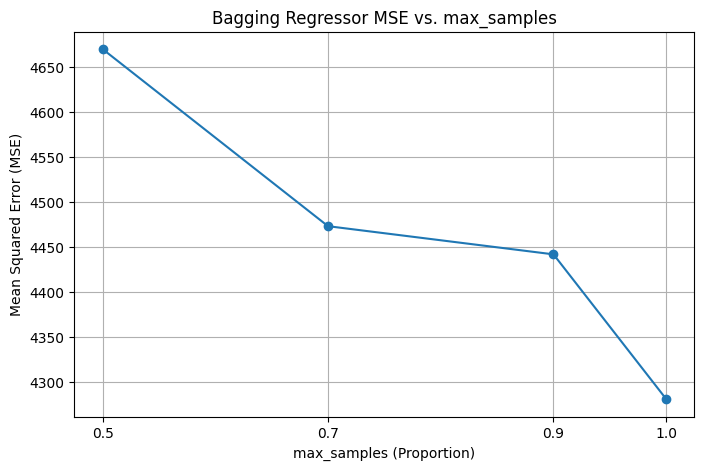

In [33]:
# Q45.Train a Bagging Regressor with different levels of bootstrap samples and compare performance.?
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt

# Generate a sample regression dataset (if not already available)
# Re-generating to ensure consistent data for this specific question if previous data was modified
X_reg, y_reg = make_regression(n_samples=1000, n_features=15, n_informative=10, noise=15.0, random_state=42)

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Define a list of different `max_samples` values to try
# These represent the proportion of samples (or number of samples if int)
# to draw from X_train for each base estimator.
# Common values are 1.0 (sample entire dataset - not standard Bagging),
# or a fraction (e.g., 0.5, 0.7, 0.8) or an integer number of samples.
# Let's try fractions representing levels of bootstrap sampling.
max_samples_list = [0.5, 0.7, 0.9, 1.0] # 1.0 is technically pasting, not bagging with replacement

# Dictionary to store MSE for each `max_samples` value
mse_scores_bootstrap = {}

# Create a base Decision Tree Regressor (same base estimator for all Bagging models)
base_regressor = DecisionTreeRegressor(random_state=42)

print("Training Bagging Regressor with different levels of bootstrap samples (max_samples):")

for max_samples_ratio in max_samples_list:
  print(f"  Training with max_samples={max_samples_ratio}...")
  # Create a Bagging Regressor with the current max_samples value
  # We use 50 estimators as a fixed value for this comparison
  bagging_regressor_bs = BaggingRegressor(
      estimator=base_regressor,
      n_estimators=50,
      max_samples=max_samples_ratio,
      bootstrap=True, # Ensure bootstrap sampling is True
      random_state=42,
      n_jobs=-1 # Use all available cores for faster training
  )

  # Train the Bagging Regressor
  bagging_regressor_bs.fit(X_train_reg, y_train_reg)

  # Make predictions on the test set
  y_pred_reg_bs = bagging_regressor_bs.predict(X_test_reg)

  # Calculate Mean Squared Error (MSE)
  mse = mean_squared_error(y_test_reg, y_pred_reg_bs)

  # Store the MSE
  mse_scores_bootstrap[max_samples_ratio] = mse

  print(f"    Mean Squared Error (MSE): {mse:.4f}")

# Print the results
print("\n--- Performance Comparison (Bagging Regressor MSE vs. max_samples) ---")
for samples, mse in mse_scores_bootstrap.items():
  print(f"max_samples: {samples}, MSE: {mse:.4f}")

# Optional: Plot the MSE scores
plt.figure(figsize=(8, 5))
# Convert float keys to strings for the plot ticks if needed, or just plot directly
plt.plot(list(mse_scores_bootstrap.keys()), list(mse_scores_bootstrap.values()), marker='o')
plt.title("Bagging Regressor MSE vs. max_samples")
plt.xlabel("max_samples (Proportion)")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(max_samples_list) # Ensure ticks are at the exact values tested
plt.grid(True)
plt.show()